In [1]:
import zipfile
import os

# Path to zip file
zip_path = '/Users/hafsahasad/Downloads/archive.zip'

# Extract all files into current folder (where notebook is running)
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('.')

# Check extracted files
os.listdir('.')


['~$mplate_bullet (1).doc',
 '~$urnalRubric(2).docx',
 '.DS_Store',
 'FYP2022.v1i.yolov8.zip',
 '~$ Resume 25.docx',
 '~$fsah Resume 2022.docx',
 'football_short.avi',
 '~$Activities for Aug 13th.pptx',
 'Fake.csv',
 '.localized',
 'football',
 'Untitled.ipynb',
 'TSP',
 'labelImg',
 'Dataset',
 '~$Physics II Lab Speaker Project Presentation Slides (1).pptx',
 'chest_xray',
 '~$First day back to school(Aug 13th).pptx',
 'DataAnnotation',
 'X-rayProject',
 'objectDet',
 '~$sad resume.docx',
 '~$Equations and Solutions.pptx',
 'BUI',
 'FYP2022.v1i.yolov8',
 '~$Physics II Lab Speaker Project Presentation Slides.pptx',
 '~$Course 2 lesson 1 Aug 14th.pptx',
 '~$revised_SLR_mariokart_presentation.pptx',
 '~$eaker Project Report.docx',
 '~$6-2 Sept 9.pptx',
 '~$fsah asad.docx',
 'BreastCancerP',
 '~$Course 1 lesson 1 Aug 14th.pptx',
 'Zoom.pkg',
 'test_clip.avi',
 '~$search on Population Model.docx',
 '~$Chapter 1 Introduction_B(1).ppt',
 '~$Chapter 4.1-4.9 (3).pptx',
 '.ipynb_checkpoints',
 

In [2]:
import pandas as pd

fake_data = pd.read_csv('Fake.csv')
true_data = pd.read_csv('True.csv')

fake_data['label'] = 'FAKE'
true_data['label'] = 'REAL'

data = pd.concat([fake_data, true_data])
data = data.sample(frac=1, random_state=42).reset_index(drop=True)

data.head()


,title,text,subject,date,label
0,Ben Stein Calls Out 9th Circuit Court: Committ...,"21st Century Wire says Ben Stein, reputable pr...",US_News,"February 13, 2017",FAKE
1,Trump drops Steve Bannon from National Securit...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"April 5, 2017",REAL
2,Puerto Rico expects U.S. to lift Jones Act shi...,(Reuters) - Puerto Rico Governor Ricardo Rosse...,politicsNews,"September 27, 2017",REAL
3,OOPS: Trump Just Accidentally Confirmed He Le...,"On Monday, Donald Trump once again embarrassed...",News,"May 22, 2017",FAKE
4,Donald Trump heads for Scotland to reopen a go...,"GLASGOW, Scotland (Reuters) - Most U.S. presid...",politicsNews,"June 24, 2016",REAL


In [3]:
import pandas as pd
import numpy as np

# Load data (adjust path if needed)
fake = pd.read_csv('Fake.csv')
real = pd.read_csv('True.csv')

# Add labels
fake['label'] = 'FAKE'
real['label'] = 'REAL'

# Combine data
data = pd.concat([fake, real], ignore_index=True)

# Shuffle the rows
data = data.sample(frac=1, random_state=42).reset_index(drop=True)

# Basic exploration
print("Total examples:", len(data))
print("Fake vs Real counts:")
print(data['label'].value_counts())

# Look at some samples
display(data.sample(5))

# Clean text: lower-case, remove newline characters
def clean_text(text):
    text = text.lower()
    text = text.replace('\n', ' ')
    return text

data['text_clean'] = data['text'].apply(lambda x: clean_text(x))

# Preview cleaned text
display(data[['text_clean', 'label']].head())


Total examples: 44898
Fake vs Real counts:
label
FAKE    23481
REAL    21417
Name: count, dtype: int64


,title,text,subject,date,label
25529,BODY LANGUAGE EXPERT Gives Clear Examples Of S...,Watch the fascinating analysis of Rice s body ...,left-news,"Apr 4, 2017",FAKE
18619,Humans Of New York Photographer PUMMELS Donal...,"Brandon Stanton, the world-renowned photograph...",News,"March 15, 2016",FAKE
21369,Liberals Brilliantly Troll The GOP With A Pet...,"Every time a school shooting happens, the idio...",News,"March 25, 2016",FAKE
19092,UPDATE: TRANSGENDER TARGET BOYCOTT Reaches Boi...,Note to Target CEO: When you endanger the safe...,politics,"May 12, 2016",FAKE
16220,"THEY KNEW! Federal Government Knew Flint, MI W...",This story is for anyone who believes the gove...,politics,"Jan 15, 2016",FAKE


,text_clean,label
0,"21st century wire says ben stein, reputable pr...",FAKE
1,washington (reuters) - u.s. president donald t...,REAL
2,(reuters) - puerto rico governor ricardo rosse...,REAL
3,"on monday, donald trump once again embarrassed...",FAKE
4,"glasgow, scotland (reuters) - most u.s. presid...",REAL


In [4]:
from sklearn.model_selection import train_test_split

# Features = cleaned text, Labels = FAKE/REAL
X = data['text_clean']
y = data['label']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set size:", len(X_train))
print("Test set size:", len(X_test))


Training set size: 35918
Test set size: 8980


In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

# Fit and transform training data, transform test data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print("TF-IDF feature matrix shape:", X_train_tfidf.shape)


TF-IDF feature matrix shape: (35918, 111073)


In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize model
model = LogisticRegression(max_iter=1000)

# Train model
model.fit(X_train_tfidf, y_train)

# Predict on test set
y_pred = model.predict(X_test_tfidf)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.984966592427617

Classification Report:
               precision    recall  f1-score   support

        FAKE       0.99      0.98      0.99      4696
        REAL       0.98      0.99      0.98      4284

    accuracy                           0.98      8980
   macro avg       0.98      0.99      0.98      8980
weighted avg       0.98      0.98      0.98      8980



Matplotlib is building the font cache; this may take a moment.


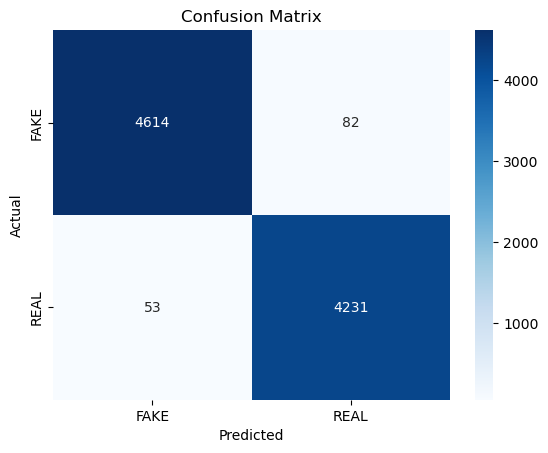

In [7]:
#step 6

import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred, labels=['FAKE','REAL'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['FAKE','REAL'], yticklabels=['FAKE','REAL'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
